In [22]:
import numpy as np
import pyspiel
from open_spiel.python.egt.utils import game_payoffs_array

## 1. Creating New games


Before creating, let's first see the docstring of the creation function and matrix game

In [23]:
print(pyspiel.create_matrix_game.__doc__)

create_matrix_game(*args, **kwargs)
Overloaded function.

1. create_matrix_game(arg0: str, arg1: str, arg2: list[str], arg3: list[str], arg4: list[list[float]], arg5: list[list[float]]) -> pyspiel.MatrixGame

Creates an arbitrary matrix game from named rows/cols and utilities.

2. create_matrix_game(arg0: list[list[float]], arg1: list[list[float]]) -> pyspiel.MatrixGame

Creates an arbitrary matrix game from dimensions and utilities.

3. create_matrix_game(arg0: list[list[float]], arg1: list[list[float]]) -> pyspiel.MatrixGame

Creates an arbitrary matrix game from dimensions and utilities.


In [97]:
print(dir(pyspiel.MatrixGame))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', 'action_to_string', 'deserialize_state', 'get_parameters', 'get_type', 'information_state_tensor_layout', 'information_state_tensor_shape', 'information_state_tensor_size', 'make_observer', 'max_chance_nodes_in_history', 'max_chance_outcomes', 'max_game_length', 'max_history_length', 'max_move_number', 'max_utility', 'min_utility', 'new_initial_state', 'new_initial_state_for_population', 'new_initial_states', 'num_distinct_actions', 'num_players', 'observation_tensor_layout', 'observation_tensor_shape', 'observation_tensor_size', 'policy_tensor_shape', 'utility_sum']


In [25]:

"""rock-paper-scissors"""
payoff1 = np.array([[0, -0.05, 0.25], [0.05, 0, -0.5], [-0.25, 0.5, 0]])
payoff2 = -payoff1
rps_game = pyspiel.create_matrix_game(payoff1, payoff2)
rps_p_mat = game_payoffs_array(rps_game)

"""Subsidy game"""
payoff1 = np.array([[12, 0], [11, 10]])
payoff2 = np.array([[12, 11], [0, 10]])
sub_game = pyspiel.create_matrix_game(payoff1, payoff2)
sub_p_mat = game_payoffs_array(sub_game)

"""Battle of Sexes"""
payoff1 = np.array([[3, 0], [0, 2]])
payoff2 = np.array([[2, 0], [0, 3]])
sex_game = pyspiel.create_matrix_game(payoff1, payoff2)
sex_p_mat = game_payoffs_array(sex_game)

"""Prisoners Dilemma"""
payoff1 = np.array([[-1, -4], [0, -3]])
payoff2 = np.array([[-1, 0], [-4, -3]])
pd_game = pyspiel.create_matrix_game(payoff1, payoff2)
pd_p_mat = game_payoffs_array(pd_game)

### 1.1 Nash Equilibrium
Using functions given by open_spiel along with hand calculation to give the NE for each game

##### Rock paper Scissors
The result of the function is correct and is the only NE here. It's not a strict NE since it's a mixed-strategy NE.

In [26]:
from open_spiel.python.algorithms.matrix_nash import lemke_howson_solve

In [27]:
def nash_equilibrium(p_mat):
    # using this function to calculate NE. There is no guarantee that the result will be complete and correct
    nash = lemke_howson_solve(p_mat[0], p_mat[1])
    for v in nash:
        print(v)

In [28]:
nash_equilibrium(rps_p_mat)

(array([0.625 , 0.3125, 0.0625]), array([0.625 , 0.3125, 0.0625]))
(array([0.625 , 0.3125, 0.0625]), array([0.625 , 0.3125, 0.0625]))
(array([0.625 , 0.3125, 0.0625]), array([0.625 , 0.3125, 0.0625]))
(array([0.625 , 0.3125, 0.0625]), array([0.625 , 0.3125, 0.0625]))
(array([0.625 , 0.3125, 0.0625]), array([0.625 , 0.3125, 0.0625]))
(array([0.625 , 0.3125, 0.0625]), array([0.625 , 0.3125, 0.0625]))


##### Subsidy Game
It only shows the pure-strategy NE this time. But there is still another mix-strategy NE: $$([\frac{10}{11}, \frac{1}{11}], [\frac{10}{11}, \frac{1}{11}])$$

In [29]:
nash_equilibrium(sub_p_mat)

(array([1., 0.]), array([1., 0.]))
(array([0., 1.]), array([0., 1.]))
(array([1., 0.]), array([1., 0.]))
(array([0., 1.]), array([0., 1.]))


##### Battle of the Sexes
Still, the function only gives pure-strategy NE. However, there is still another mixed-strategy NE: $$([\frac{3}{5}, \frac{2}{5}], [\frac{2}{5}, \frac{3}{5}])$$

In [30]:
nash_equilibrium(sex_p_mat)

(array([1., 0.]), array([1., 0.]))
(array([0., 1.]), array([0., 1.]))
(array([1., 0.]), array([1., 0.]))
(array([0., 1.]), array([0., 1.]))


##### Prisoners Dilemma
The result is correct. The two prisoner will both choose to defect. However, this choice is apparently the best(they result can be better if they both cooperate) and thus called the dilemma

In [31]:
nash_equilibrium(pd_p_mat)

(array([0., 1.]), array([0., 1.]))
(array([0., 1.]), array([0., 1.]))
(array([0., 1.]), array([0., 1.]))
(array([0., 1.]), array([0., 1.]))


## 2. Learning Dynamics
### 2.1 Replicator Dynamics
Plot of replicator dynamics is easy here. But we shall use different classes to plot the result based on the number of actions and so on.

In [32]:
from open_spiel.python.egt import dynamics
from open_spiel.python.egt import visualization
import matplotlib.pyplot as plt

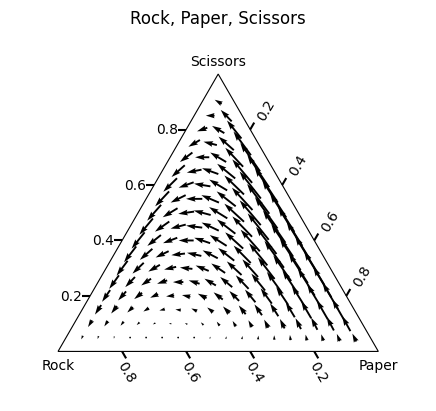

In [33]:
# replicator dynamics of rock-paper-scissors
# It's 3x3 actions, and is a symmetric game, therefore we use SinglePopulationDynamics.
# SinglePopulationDynamics plots dynamics of self-play.
dyn = dynamics.SinglePopulationDynamics(rps_p_mat, dynamics.replicator)
# such projection is defined inside of visualization package
ax = plt.subplot(projection="3x3")
ax.quiver(dyn)
# set labels
ax.set_labels(["Rock", "Paper", "Scissors"])
plt.title("Rock, Paper, Scissors")
plt.show()

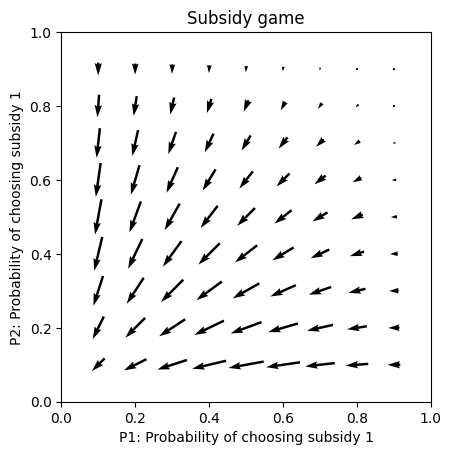

In [34]:
# replicator dynamics of subsidy game
dyn = dynamics.MultiPopulationDynamics(sub_p_mat, dynamics.replicator)
# Then plot
ax = plt.subplot(projection="2x2")
ax.quiver(dyn)

plt.xlabel("P1: Probability of choosing subsidy 1")
plt.ylabel("P2: Probability of choosing subsidy 1")
plt.title("Subsidy game")
plt.show()

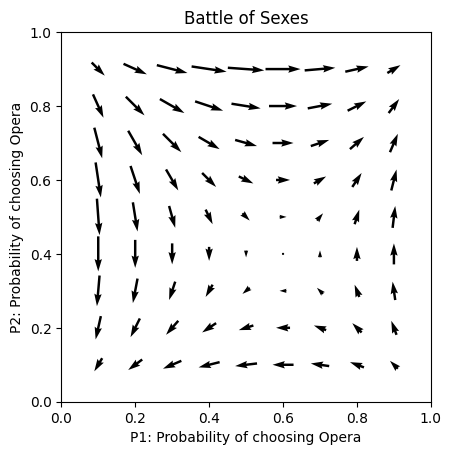

In [35]:
# replicator dynamics of Battle of Sexes
dyn = dynamics.MultiPopulationDynamics(sex_p_mat, dynamics.replicator)
# Then plot
ax = plt.subplot(projection="2x2")
ax.quiver(dyn)

plt.xlabel("P1: Probability of choosing Opera")
plt.ylabel("P2: Probability of choosing Opera")
plt.title("Battle of Sexes")
plt.show()

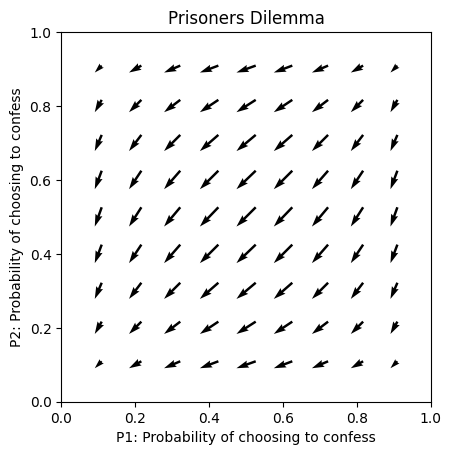

In [36]:
# replicator dynamics of Prisoners Dilemma
dyn = dynamics.MultiPopulationDynamics(pd_p_mat, dynamics.replicator)
# Then plot
ax = plt.subplot(projection="2x2")
ax.quiver(dyn)

plt.xlabel("P1: Probability of choosing to confess")
plt.ylabel("P2: Probability of choosing to confess")
plt.title("Prisoners Dilemma")
plt.show()

### 2.2 Lenient Boltzmann Q-Learning Dynamics
We implemented our own classes to plot this. They always uses boltzmann dynamics and expose two more parameters for adjustment: `K:leniency; T:temperature` 

In [37]:
import lenient_dynamics as ld  # package that implements LBQ

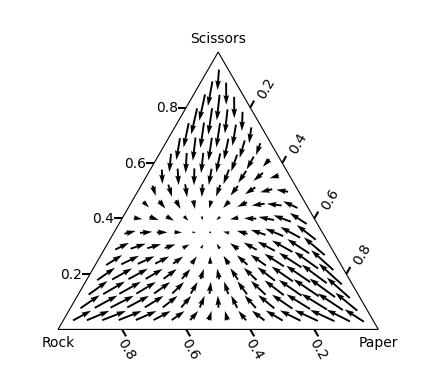

In [38]:
dyn = ld.LBQSinglePopulationDynamics(rps_p_mat, K=1, T=1)
ax = plt.subplot(projection="3x3")
ax.quiver(dyn)
ax.set_labels(["Rock", "Paper", "Scissors"])
plt.show()

Since the introduction of exploration mechanism, SSE here doesn't align with any NE. The reason behind it is that the policy is now restricted to narrower scope(close to equally likely for each action)

We set K=1 here and thus has no impact on the result

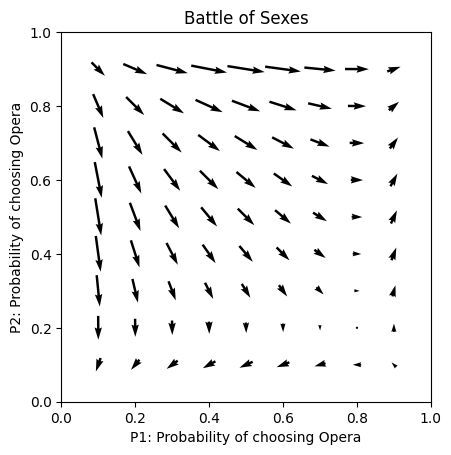

In [39]:
dyn = ld.LBQTwoPopulationDynamics(sex_p_mat, K=5, T=0.001)
ax = plt.subplot(projection="2x2")
ax.quiver(dyn)
plt.xlabel("P1: Probability of choosing Opera")
plt.ylabel("P2: Probability of choosing Opera")
plt.title("Battle of Sexes")
plt.show()

Here, we set T approximately to 0 so that it will have nearly no impact on the result. Instead, we set k to a high value. the impact of K is it will bias the gradient towards the action that has the highest best possible payoff.

## 3.RL learning
### 3.1 Template provided by open_spiel
The template is a self-learning Q learning agent playing Tic-Tac-Toe game

In [40]:
# little test about what .num_distinct_actions() would return
test_game = pyspiel.create_matrix_game([[1, 1, 1], [2, 2, 2]], [[1, 1, 1], [2, 2, 2]])
print(test_game.num_distinct_actions())
print(test_game.num_rows())
print(test_game.num_cols())

"""
Analysis:
    different actions of one player are indicated by different numbers
    Here, for row player, the number of action is : 0, 1
    for col player: 0, 1, 2
    So there are 3 distinct actions(0,1,2)?
"""

3
2
3


'\nAnalysis:\n    different actions of one player are indicated by different numbers\n    Here, for row player, the number of action is : 0, 1\n    for col player: 0, 1, 2\n    So there are 3 distinct actions(0,1,2)?\n'

In [41]:
# Let's do independent Q-learning in Tic-Tac-Toe, and play it against random.
# RL is based on python/examples/independent_tabular_qlearning.py
from open_spiel.python import rl_environment
from open_spiel.python import rl_tools
from open_spiel.python.algorithms import tabular_qlearner

# Create the environment - by indicating the name of built-in game
# One can also create his own game and pass it in
env = rl_environment.Environment("tic_tac_toe")
num_players = env.num_players
num_actions = env.action_spec()["num_actions"]
print(num_actions)
# Create the agents
agents = [
    tabular_qlearner.QLearner(player_id=idx, num_actions=num_actions)
    for idx in range(num_players)
]
"""
Self-play means that two agents use the same algorithm to learn against each other
"""

9


'\nSelf-play means that two agents use the same algorithm to learn against each other\n'

In [42]:
# Train the Q-learning agents in self-play.
for cur_episode in range(25000):
    if cur_episode % 1000 == 0:
        print(f"Episodes: {cur_episode}")
    time_step = env.reset()
    while not time_step.last():
        player_id = time_step.observations["current_player"]
        # Here, since the game is round based, every agent has a unique id from 0 - (n-1)
        # The agent chooses an appropriate action based on the current state
        agent_output = agents[player_id].step(time_step)
        time_step = env.step([agent_output.action])
    # Episode is over, step all agents with final info state.
    for agent in agents:
        agent.step(time_step)
print("Done!")

Episodes: 0
Episodes: 1000
Episodes: 2000
Episodes: 3000
Episodes: 4000
Episodes: 5000
Episodes: 6000
Episodes: 7000
Episodes: 8000
Episodes: 9000
Episodes: 10000
Episodes: 11000
Episodes: 12000
Episodes: 13000
Episodes: 14000
Episodes: 15000
Episodes: 16000
Episodes: 17000
Episodes: 18000
Episodes: 19000
Episodes: 20000
Episodes: 21000
Episodes: 22000
Episodes: 23000
Episodes: 24000
Done!


In [43]:
# Evaluate the Q-learning agent against a random agent.
from open_spiel.python.algorithms import random_agent

eval_agents = [agents[0], random_agent.RandomAgent(1, num_actions, "Entropy Master 2000")]

time_step = env.reset()
while not time_step.last():
    print("")
    print(env.get_state)
    player_id = time_step.observations["current_player"]
    # Note the evaluation flag. A Q-learner will set epsilon=0 here.
    agent_output = eval_agents[player_id].step(time_step, is_evaluation=True)
    print(f"Agent {player_id} chooses {env.get_state.action_to_string(agent_output.action)}")
    time_step = env.step([agent_output.action])

print("")
print(env.get_state)
print(time_step.rewards)



...
...
...
Agent 0 chooses x(0,0)

x..
...
...
Agent 1 chooses o(1,1)

x..
.o.
...
Agent 0 chooses x(2,0)

x..
.o.
x..
Agent 1 chooses o(1,2)

x..
.oo
x..
Agent 0 chooses x(1,0)

x..
xoo
x..
[1.0, -1.0]


### 3.2 Applying Q-learner on Matrix Games
First we see some normal attributes of a matrix game

In [44]:
game_type = rps_game.get_type()
print(game_type)
"""
Different dynamics:
    round base:
        SEQUENTIAL
        MEAN_FIELD
    
    simultaneous:
        SIMULTANEOUS
"""
print(f"Round type: {game_type.dynamics}")

"""
Information state includes current observation and the part of the history of the game, whereas observation doesn't have such memory of history.
However, in our matrix game, there is no state transition so that these two concept are equally useful.
"""
print(f"Provide observation tensor?: {game_type.provides_observation_tensor}")
print(f"Provide Information state tensor?: {game_type.provides_information_state_tensor}")

<GameType 'short_name'>
Round type: Dynamics.SIMULTANEOUS
Provide observation tensor?: True
Provide Information state tensor?: True


In [45]:
# experiment of observation tensor
game = pyspiel.load_game("tic_tac_toe")
state = game.new_initial_state()
state.apply_action(4)  # Middle
state.apply_action(2)  # Top-right
state.apply_action(0)
state.apply_action(1)

# Player 0's turn.
shape = game.observation_tensor_shape()
print(state.observation_tensor())
print(state.observation_tensor(0))

# First dimension interpreted as selecting from 2D planes of { empty, O, X }.
print(np.reshape(np.asarray(state.observation_tensor()), shape))

print(f"Observation string:\n{state.observation_string()}")
"""
In tic-tac-toe game, the observation is the current game state, which consists of:
    1. which position is occupied
    2. which position is occupied by which player

Observation string integrate the information visually
"""



[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[[[0. 0. 0.]
  [1. 0. 1.]
  [1. 1. 1.]]

 [[0. 1. 1.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 0.]]]
Observation string:
xoo
.x.
...


'\nIn tic-tac-toe game, the observation is the current game state, which consists of:\n    1. which position is occupied\n    2. which position is occupied by which player\n\nObservation string integrate the information visually\n'

### 3.2.1 ε-greedy Q-learning with Trajectory
I've got enough experiments and can move on to try to learn agents on these games.

We first put our eyes on ε-greedy Q learning, with constant ε value. We can try other ε value schedule later by using the scheduler under `open_spiel.python.rl_tools`

##### Rock-Paper-Scissors


In [99]:
from open_spiel.python import rl_environment
from open_spiel.python import rl_tools
from open_spiel.python.algorithms import tabular_qlearner
import collections

In [192]:
"""
TODO: perhaps set one parameter which give the type of agent to use with additional *kargs to be passed to the constructor in the future
"""
LearningTrajectories = collections.namedtuple("learning_trajectories", ["player1", "player2"])

def epsilon_greedy_qlearning(game:pyspiel.MatrixGame, 
                             episodes:int = 100,
                             step_size:float = 0.1, 
                             epsilon_schedule:rl_tools.ValueSchedule = rl_tools.ConstantSchedule(0.2),
                             discount_factor:float = 1.0) -> LearningTrajectories:
    """
    Train self-play agents with epsilon greedy q-learning algorithm on the given matrix game
    
    :param game: A matrix game to be played(Simultaneous move, general form game)
    :param episodes: Number of episodes(number of complete game to go through)
    :param step_size: learning rate
    :param epsilon_schedule: schedule of epsilon value during training process
    :param discount_factor: discount factor for q-learning
    :return: LearningTrajectory of two players
    """
    
    """environment creation & agents creation"""
    env = rl_environment.Environment(game)
    num_players = env.num_players
    num_actions = env.action_spec()["num_actions"]
    # Create the agents
    agents = [
        tabular_qlearner.QLearner(
            player_id=idx,
            num_actions=num_actions,
            step_size=step_size,  # learning rate
            epsilon_schedule=epsilon_schedule,  # ε value scheduler, here it remains constant
            discount_factor=discount_factor  # discount of value over time
        )
        for idx in range(num_players)
    ]
    
    
    """Train the Q-learning agents in self-play."""
    policy_change = [[], []]
    # Train by finishing 100 complete games
    for cur_episode in range(episodes):
        if cur_episode % 1000 == 0:
            print(f"Episodes: {cur_episode}")
        
        # reset the game
        time_step = env.reset()
        """
            We didn't use evaluation mode to get probability because of the following reasons::
                1. In evaluation mode, it will always return the optimal action, which is normally a pure strategy
                2. In the learning process, the policy one agent use is the mixed policy with the probability distribution calculated by applying exploration mechanism on Q-values of the current state. Therefore, it's more reasonable to use this one rather than the one got in evaluation mode.
        """
        while not time_step.last():
            joint_actions = []
            # In a matrix game, agents simultaneously pick up one action and get reward based on the joint action
            idx = 0
            for agent in agents:
                agent_output = agent.step(time_step)
                joint_actions.append(
                    agent_output.action)  # chosen action & probability distribution over action under current exploration method 
                policy_change[idx].append(agent_output.probs)
                idx += 1
            time_step = env.step(joint_actions)
        # Episode is over, step all agents with final info state.
        # In matrix games, this is the place and the only place where the Q value is updated
        for agent in agents:
            agent.step(time_step)
    
    print("Done!")
    return LearningTrajectories(player1=policy_change[0], player2=policy_change[1])



In [193]:
def learning_trajectory(p_mat:np.ndarray, gra_cal, dyns,  lts:LearningTrajectories = None, labels:list = None, title:str = None, **kwargs):
    """
    Plotting trajectory on a learning dynamics plot
    
    :param p_mat: payoff-matrix of the game.
    :param gra_cal: functon that calculate the gradient of current population.
    :param dyns: Population dynamics used to sample points and calculate learning dynamics.
    :param lts: learning trajectory
    :param labels: labels for plot
    :param title: title for plot
    :param kwargs: other parameters passed to the plotting function
    :return: 
    """
    if p_mat.shape[1] == 3:
        assert labels is None or len(labels) == 3
        assert np.asarray(lts.player1).shape[1] == 3
        assert issubclass(dyns, dynamics.SinglePopulationDynamics)
        dyn = dyns(p_mat, gra_cal)
        ax = plt.subplot(projection="3x3")
        ax.quiver(dyn)
        ax.plot(lts.player1, **kwargs)
        ax.set_labels(labels)
        plt.title(title)
        plt.show()
    else:
        assert labels is None or len(labels) == 2
        assert np.asarray(lts.player1).shape[1] == 2
        assert issubclass(dyns, dynamics.MultiPopulationDynamics)
        lts = np.stack([np.array(lts.player1)[:,0], np.array(lts.player2)[:,0]]).T
        dyn = dyns(p_mat, gra_cal)
        ax = plt.subplot(projection="2x2")
        ax.quiver(dyn)
        ax.plot(lts[:,0], lts[:,1], **kwargs)
        if labels is not None:
            plt.xlabel(labels[0])
            plt.ylabel(labels[1])
        plt.title(title)
        plt.show()
        
        

In [194]:
"""Learning"""
lts = epsilon_greedy_qlearning(rps_game)

Episodes: 0
Done!


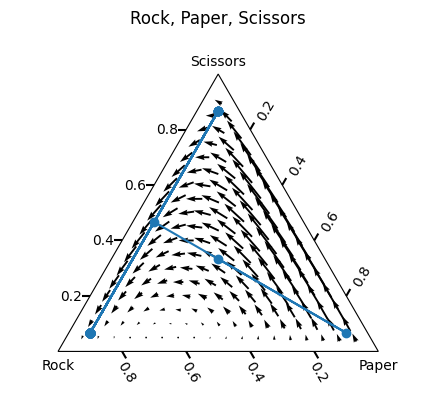

In [195]:
"""Plotting"""

learning_trajectory(rps_p_mat, dynamics.replicator, dynamics.SinglePopulationDynamics, 
                  lts=lts,
                  labels=["Rock", "Paper", "Scissors"],
                  title="Rock, Paper, Scissors",
                  marker='o'
                  )

In [196]:
lts = epsilon_greedy_qlearning(sex_game, episodes=15000, step_size=0.05, discount_factor=0.9, epsilon_schedule=rl_tools.ConstantSchedule(0.15) )

Episodes: 0
Episodes: 1000
Episodes: 2000
Episodes: 3000
Episodes: 4000
Episodes: 5000
Episodes: 6000
Episodes: 7000
Episodes: 8000
Episodes: 9000
Episodes: 10000
Episodes: 11000
Episodes: 12000
Episodes: 13000
Episodes: 14000
Done!


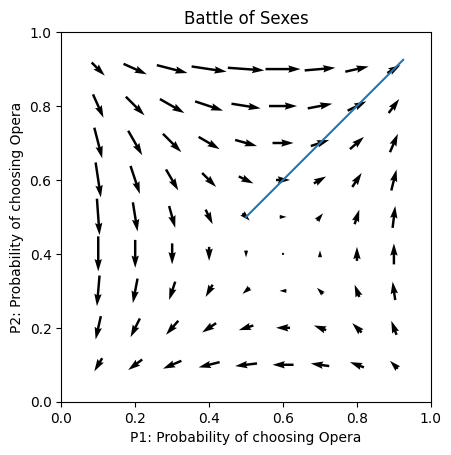

In [197]:
# perhaps we can add the fina pure strategy as the final strategy? Maybe not.
learning_trajectory(sex_p_mat, dynamics.replicator, dynamics.MultiPopulationDynamics, 
                  lts=lts,
                  labels=["P1: Probability of choosing Opera", "P2: Probability of choosing Opera"],
                  title="Battle of Sexes"
                  )

To be honest, when applying ε-greedy on q-learning there is only three different possible policy it can return
1. (0.5,0.5) when it has no preference on one specific action
2. $(1-\frac{ε}{2}, \frac{ε}{2})$ when it prefers the first action
3. $(\frac{ε}{2}, 1-\frac{ε}{2})$ when it prefers the second action

It's very easy to calculate and prove. Besides, this three mixed-policy is also what one agent can offer in learning process. You can see the granularity is not ideal.